<a href="https://colab.research.google.com/github/avilashsrivastava/Mobile-Price-Range-Prediction/blob/main/Individual_Final_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Mobile Price Range Prediction </u></b>

# **Introduction**
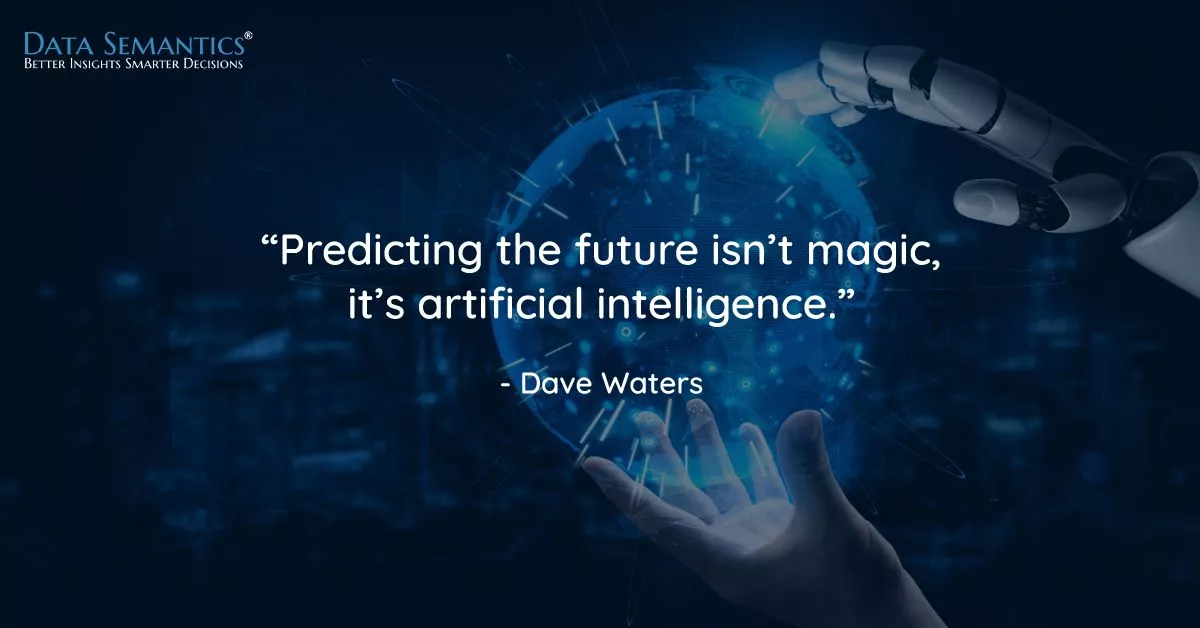

They say 'Time' is an illusion. All three; the past, present and future exist at the same time. Well, Iam not here to judge this statement but to provoke an understanding of how, everything seems correlated, sometimes. There is an old saying that if you can sense the future, you can change your present, maybe even your past. Imagine you could change your past, where you did a terrible mistake, or imagine changing that one decision you took, that could have taken your life on a prosperous path. But you know thats not going to happen, not now but maybe in the future. Maybe someone actually builds a Time Machine!

Well philosophies apart, looking at the pace at which Artificial Intelligence is evolving, we may soon reach at a level to manipulate time. But its still a long distance to go. Now you may think AI or machine learning is at the baby stage and still trying to learn about this world. Even at a preliminary stage it is performing wonders, way beyond human capabilities.

AI or MI is now being used in every feilds, handling huge amounts of data, identifying trends, relations and performing predictions. You see now, how we have started to predict future! (not perfectly but close enough). These predictions are now helping to make our thought process more optimistic and to be prepared for the future.

That being said, in this exercise, Iam going to implement one of the use cases of machine learning in predicting the range of prices a modern day mobile phone would have, given its specifications. We will see how these predictions can help a business or a person to make better decisions. The contents of the kernel include:

1. <b> Exploratory data analysis:</b> In this section we will try to fetch the story hidden in the dataset we have.

2. <b> Data Wrangling:</b> In this section we will make our data clean of all impurities and make it 'Modelling" ready!

3. <b> Splitting the data and Standardization:</b> In this section we will split our data into training and test set and apply transformation.

4. <b> Fitting models:</b> In this section we will implement various machine learning algorithms to make predictions.

5. <b> Model Explainability:</b> In this section we will see the working of our model.

6. <b> Conclusion:</b> Finally, we will point down our observations and calculations.

Lets do it!

In [1]:
# importing libraries that will help us in our endeavour
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier




# to not get tensed over unnecessary warnings we will ignore them
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading the data
directory_path='/content/drive/MyDrive/Almabetter/Mobile Price Range Prediction - Avilash Srivastava/'
mobile_df=pd.read_csv(directory_path + 'data_mobile_price_range.csv')

# Note: Please change the directory path of the file when running in different system

In [4]:
# taking an initial look at the data
mobile_df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
 # tail part
 mobile_df.tail(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [6]:
# lets have a look at the colulms
print('The columns in the dataset are:\n',mobile_df.columns.to_list())
print('\nThe no. of columns present in the dataset are: ',len(mobile_df.columns.to_list()))

The columns in the dataset are:
 ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']

The no. of columns present in the dataset are:  21


In [7]:
# lets check the no. of rows we have
print('The no. of rows in the dataset are: ',len(mobile_df))

The no. of rows in the dataset are:  2000


In [8]:
# lets see how many data types we have 
mobile_df.info()
print('\nThe data types we have are: float and integers')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

**Understanding Problem Statement**

Mobile phones have become the greatest necessity for almost all individuals nowadays. People want more features and best specifications in a phone and that too at cheaper prices. The demand for phones is so high that there is a huge competition prevailing between mobile manufacturers. To stay ahead in the race, these companies try to bring in new features and innovations so that people are lured towards buying their brand smartphones. 

Price of a mobile phone is influenced by various factors. Brand name, newness of the model, specifiactions such as internal memory, camera, ram, sizes, connectivity etc., are some of the important factors in determining the price.
As a business point of view, it becomes an utmost priority to analyse these factors from time to time and come up with best set of specifications and price ranges so that people buy their mobile phones.

Hence, through this exercise and our predictions we will try to help companies estimate price of mobiles to give tough competion to other mobile manufacturer and also it will be usefull for customers to verify that they are paying best price for a mobile.

To start with let us look at the features/variables/columns we have in our dataset and see what they mean:

1. Battery_power - Total energy a battery can store in one time measured in mAh

2. Blue - Has bluetooth or not

3. Clock_speed - speed at which microprocessor executes instructions

4. Dual_sim - Has dual sim support or not

5. Fc - Front Camera mega pixels

6. Four_g - Has 4G or not

7. Int_memory - Internal Memory in Gigabytes

8. M_dep - Mobile Depth in cm

9. Mobile_wt - Weight of mobile phone

10. N_cores - Number of cores of processor

11. Pc - Primary Camera mega pixels

12. Px_height - Pixel Resolution Height

13. Px_width - Pixel Resolution Width

14. Ram - Random Access Memory in Mega Bytes

15. Sc_h - Screen Height of mobile in cm

16. Sc_w - Screen Width of mobile in cm

17. Talk_time - longest time that a single battery charge will last when you are

18. Three_g - Has 3G or not

19. Touch_screen - Has touch screen or not

20. Wifi - Has wifi or not

21. Price_range - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).


# **1. Exploratory Data Analysis**